In [1]:
from keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D,BatchNormalization
from tensorflow.keras.optimizers import Adam
import os
import pandas as pd
import numpy as np


In [2]:

TRAIN_DIR = 'Dataset/images/train'
TEST_DIR = 'Dataset/images/test'

In [3]:

def makedataframe(dir):
    image_paths = []
    labels = []
    for label in os.listdir(dir):
        for imagename in os.listdir(os.path.join(dir,label)):
            image_paths.append(os.path.join(dir,label,imagename))
            labels.append(label)
        print(label, "completed")
    return image_paths,labels

In [4]:

train = pd.DataFrame()
train['image'], train['label'] = makedataframe(TRAIN_DIR)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [5]:
print(train)

                                        image     label
0            Dataset/images/train\angry\0.jpg     angry
1            Dataset/images/train\angry\1.jpg     angry
2           Dataset/images/train\angry\10.jpg     angry
3        Dataset/images/train\angry\10002.jpg     angry
4        Dataset/images/train\angry\10016.jpg     angry
...                                       ...       ...
28816  Dataset/images/train\surprise\9969.jpg  surprise
28817  Dataset/images/train\surprise\9985.jpg  surprise
28818  Dataset/images/train\surprise\9990.jpg  surprise
28819  Dataset/images/train\surprise\9992.jpg  surprise
28820  Dataset/images/train\surprise\9996.jpg  surprise

[28821 rows x 2 columns]


In [6]:

test = pd.DataFrame()
test['image'], test['label'] = makedataframe(TEST_DIR)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [7]:

print(test)
print(test['image'])

                                      image     label
0       Dataset/images/test\angry\10052.jpg     angry
1       Dataset/images/test\angry\10065.jpg     angry
2       Dataset/images/test\angry\10079.jpg     angry
3       Dataset/images/test\angry\10095.jpg     angry
4       Dataset/images/test\angry\10121.jpg     angry
...                                     ...       ...
7061  Dataset/images/test\surprise\9806.jpg  surprise
7062  Dataset/images/test\surprise\9830.jpg  surprise
7063  Dataset/images/test\surprise\9853.jpg  surprise
7064  Dataset/images/test\surprise\9878.jpg  surprise
7065   Dataset/images/test\surprise\993.jpg  surprise

[7066 rows x 2 columns]
0         Dataset/images/test\angry\10052.jpg
1         Dataset/images/test\angry\10065.jpg
2         Dataset/images/test\angry\10079.jpg
3         Dataset/images/test\angry\10095.jpg
4         Dataset/images/test\angry\10121.jpg
                        ...                  
7061    Dataset/images/test\surprise\9806.jpg
7062 

In [8]:
from tqdm.notebook import tqdm
def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image, color_mode='grayscale')  # Use color_mode='grayscale'
        img = np.array(img)
        features.append(img)
    
    features = np.array(features)
    features = features.reshape(len(features), 48, 48, 1)
    return features

In [9]:
train_features = extract_features(train['image']) 

  0%|          | 0/28821 [00:00<?, ?it/s]

In [10]:
test_features = extract_features(test['image'])

  0%|          | 0/7066 [00:00<?, ?it/s]

In [11]:
x_train = train_features/255.0
x_test = test_features/255.0

In [12]:

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(train['label'])

LabelEncoder()

In [13]:
y_train = le.transform(train['label'])
y_test = le.transform(test['label'])


In [14]:

y_train = to_categorical(y_train,num_classes = 7)
y_test = to_categorical(y_test,num_classes = 7)

In [15]:
model = Sequential()

    # First Convolutional Block - Same size but with BatchNormalization
model.add(Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=(48,48,1)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))

    # Second Convolutional Block
model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))

    # Third Convolutional Block
model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))

    # Fourth Convolutional Block
model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Flatten())

    # Dense Layers
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Dense(7, activation='softmax'))

C:\Users\pc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])

In [17]:

model.fit(x_train, 
          y_train,
          batch_size=64,  
          epochs=50,      
          validation_data=(x_test, y_test),
          shuffle=True)

Epoch 1/50
451/451 ━━━━━━━━━━━━━━━━━━━━ 152s 331ms/step - accuracy: 0.1649 - loss: 2.7866 - val_accuracy: 0.2594 - val_loss: 1.9937
Epoch 2/50
451/451 ━━━━━━━━━━━━━━━━━━━━ 151s 335ms/step - accuracy: 0.2064 - loss: 2.3438 - val_accuracy: 0.3162 - val_loss: 1.7743
Epoch 3/50
451/451 ━━━━━━━━━━━━━━━━━━━━ 150s 333ms/step - accuracy: 0.2586 - loss: 2.1164 - val_accuracy: 0.3637 - val_loss: 1.6965
Epoch 4/50
451/451 ━━━━━━━━━━━━━━━━━━━━ 151s 335ms/step - accuracy: 0.2984 - loss: 1.9667 - val_accuracy: 0.3956 - val_loss: 1.5960
Epoch 5/50
451/451 ━━━━━━━━━━━━━━━━━━━━ 160s 354ms/step - accuracy: 0.3374 - loss: 1.8115 - val_accuracy: 0.4161 - val_loss: 1.5529
Epoch 6/50
451/451 ━━━━━━━━━━━━━━━━━━━━ 160s 356ms/step - accuracy: 0.3704 - loss: 1.7030 - val_accuracy: 0.4502 - val_loss: 1.4438
Epoch 7/50
451/451 ━━━━━━━━━━━━━━━━━━━━ 161s 356ms/step - accuracy: 0.3879 - loss: 1.6252 - val_accuracy: 0.4590 - val_loss: 1.4277
Epoch 8/50
451/451 ━━━━━━━━━━━━━━━━━━━━ 160s 356ms/step - accuracy: 0.4146 -

In [19]:

model_json = model.to_json()
with open("faceEmotionModel.json",'w') as json_file:
    json_file.write(model_json)
model.save("faceEmotionModel.keras")

In [21]:

from keras.models import model_from_json

json_file = open("faceEmotionModel.json", "r")
model_json = json_file.read()
json_file.close()
model = model_from_json(model_json)
model.load_weights("faceEmotionModel.keras")

In [25]:

label = ['angry','disgust','fear','happy','neutral','sad','surprise']

def ef(image):
    img = load_img(image,color_mode='grayscale' )
    feature = np.array(img)
    feature = feature.reshape(1,48,48,1)
    return feature/255.0


In [26]:

image = 'Dataset/images/train/sad/42.jpg'
print("original image is of sad")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)

original image is of sad
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
model prediction is  sad


original image is of sad
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
model prediction is  sad


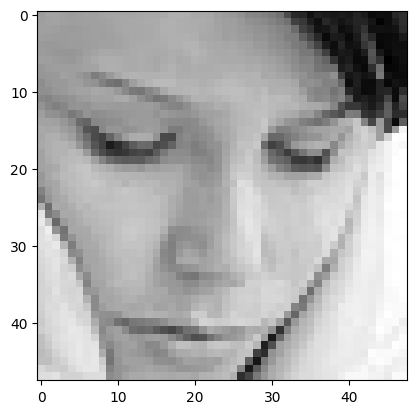

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline

image = 'Dataset/images/train/sad/42.jpg'
print("original image is of sad")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of fear
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
model prediction is  sad


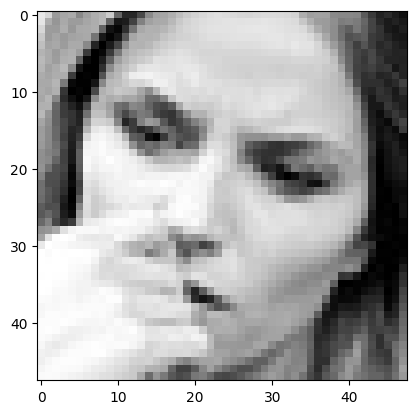

In [29]:
image = 'Dataset/images/train/fear/2.jpg'
print("original image is of fear")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of surprise
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
model prediction is  surprise


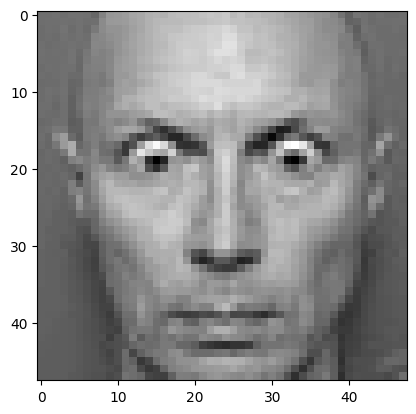

In [32]:
image = 'Dataset/images/train/surprise/15.jpg'
print("original image is of surprise")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')